In [7]:
# Load Libraries

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from roc import plot_roc
from sklearn.model_selection import GridSearchCV

In [8]:
# Load the dataset in with pandas
df = pd.read_csv('data/churn.csv')
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
# Convert the "no", "yes" values to booleans (True/False)
df["Int'l Plan"] = df["Int'l Plan"] == 'yes'
df["VMail Plan"] = df["VMail Plan"] == 'yes'
df['Churn?'] = df['Churn?'] == 'True.'

In [11]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Remove the features which are not continuous or boolean
df.drop('State', axis=1, inplace=True)
df.drop('Area Code', axis=1, inplace=True)
df.drop('Phone', axis=1, inplace=True)

In [13]:
# Create a numpy array called y containing the churn values
y = df.pop('Churn?').values

In [14]:
# Create 2 dimensional numpy array containing the feature data (everything except the labels)
X = df.values

In [15]:
X

array([[128, False, True, ..., 3, 2.7, 1],
       [107, False, True, ..., 3, 3.7, 1],
       [137, False, False, ..., 5, 3.29, 0],
       ..., 
       [28, False, False, ..., 6, 3.81, 2],
       [184, True, False, ..., 10, 1.35, 2],
       [74, False, True, ..., 4, 3.7, 0]], dtype=object)

In [16]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# Score
print("Score:", rf.score(X_test, y_test))

Score: 0.946043165468


In [19]:
# Confusion Matrix
y_predict = rf.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_predict))

Confusion matrix:
[[709   3]
 [ 42  80]]


In [20]:
# Precision & Recall
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))

Precision: 0.963855421687
Recall: 0.655737704918


In [21]:
# Build the RandomForestClassifier setting the out of bag (OOB) parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print("Accuracy score:", rf.score(X_test, y_test))
print("Out of bag score:", rf.oob_score_)

Accuracy score: 0.948441247002
Out of bag score: 0.943977591036


In [22]:
# Feature Importances
print('Feature importances:', rf.feature_importances_)
feature_importances = np.argsort(rf.feature_importances_)
print('Sorted feature importance indices:', feature_importances)
print("Top five feature names (most important first):", list(df.columns[feature_importances[-1:-6:-1]]))

Feature importances: [ 0.03599175  0.0846707   0.02688114  0.03996175  0.16225217  0.03033614
  0.11345912  0.05849387  0.02987774  0.06669127  0.03477531  0.03564153
  0.04226149  0.04351606  0.05370389  0.05077571  0.09071036]
Sorted feature importance indices: [ 2  8  5 10 11  0  3 12 13 15 14  7  9  1 16  6  4]
Top five feature names (most important first): ['Day Mins', 'Day Charge', 'CustServ Calls', "Int'l Plan", 'Eve Charge']


Plotted accuracy vs num_trees


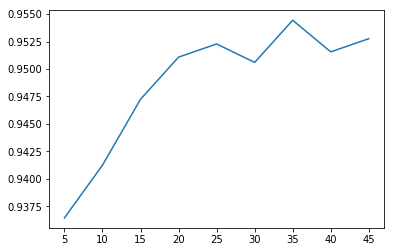

In [23]:
# Modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
print('Plotted accuracy vs num_trees')

Plotted accuracy vs. num_features


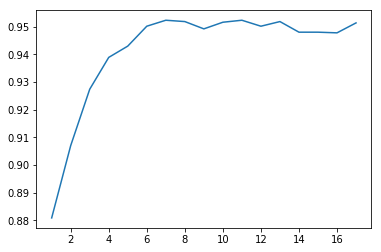

In [24]:
# Modifying the max features parameter
num_features = range(1, len(df.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_features, accuracies)
print('Plotted accuracy vs. num_features')

In [25]:
# All Models
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    K Nearest Neighbors:", get_scores(KNeighborsClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

Model, Accuracy, Precision, Recall
    Random Forest: (0.95203836930455632, 0.9555555555555556, 0.70491803278688525)
    Logistic Regression: (0.85731414868105515, 0.54285714285714282, 0.15573770491803279)
    Decision Tree: (0.93285371702637887, 0.78947368421052633, 0.73770491803278693)
    K Nearest Neighbors: (0.86810551558753002, 0.6428571428571429, 0.22131147540983606)
    Naive Bayes: (0.61031175059952036, 0.17777777777777778, 0.45901639344262296)


In [26]:
# ROC
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
plot_roc(X, y, KNeighborsClassifier, 'K_Nearest_Neighbors')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Feature ranking:
#1: Day Charge (0.207730, index=6)
#2: Day Mins (0.096389, index=4)
#3: CustServ Calls (0.084283, index=16)
#4: Intl Calls (0.078245, index=14)
#5: Int'l Plan (0.073681, index=1)
#6: Eve Mins (0.070132, index=7)
#7: Eve Charge (0.069890, index=9)
#8: Intl Charge (0.057530, index=15)
#9: VMail Message (0.038832, index=3)
#10: Night Charge (0.038564, index=12)
#11: Intl Mins (0.038166, index=13)
#12: VMail Plan (0.028816, index=2)
#13: Account Length (0.028064, index=0)
#14: Night Mins (0.026752, index=10)
#15: Night Calls (0.022219, index=11)
#16: Day Calls (0.021390, index=5)
#17: Eve Calls (0.019316, index=8)


(-1, 17)

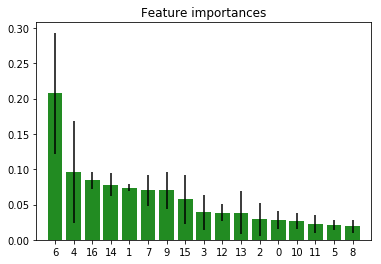

In [28]:
# Standard Deviation for feature importances across all trees
n = len(rf.feature_importances_)

importances = rf.feature_importances_
tree_importances = [tree.feature_importances_ for tree in rf.estimators_]
std = np.std(tree_importances, axis=0)
indices = np.argsort(importances)[::-1]
features = list(df.columns[indices])

# Print the feature ranking
print("Feature ranking:")

for f in range(n):
    print("#%d: %s (%f, index=%d)" % (f + 1, features[f], importances[indices[f]], indices[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(n), importances[indices], yerr=std[indices], color="forestgreen", align="center")
plt.xticks(range(n), indices)
plt.xlim([-1, n])

In [45]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Grid Search
grid = GridSearchCV(rf, param_grid=param_grid)
grid.fit(X, y)

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Accuracy of the tuned model: 0.9526
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Grid Search
grid = GridSearchCV(rf, param_grid=param_grid)
grid.fit(X, y)

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [54]:
criterion=['gini','entropy']
max_featuresl = [1,5,10,15]
max_leaf_nodesl=[2,5,10,15,20]
min_impurity_decreasel=[0,0.1,0.2,0.3]
min_impurity_splitl=[0,0.1,0.2,0.3]
min_samples_leafl=[1,5,10]
min_samples_splitl=[2,3]
min_weight_fraction_leafl=[0,0.1,0.2]
n_estimatorsl=[5,10,15,20,25] 
n_jobsl=[1,5,10,15,20,25]
oob_scorel=[False, True]
random_statel=[1,10,15,20]

param_grid = {"max_features": max_featuresl,
            "max_leaf_nodes": max_leaf_nodesl,
#             "min_impurity_decrease": min_impurity_decreasel,
#             "min_impurity_split": min_impurity_splitl,
#             "min_samples_leaf": min_samples_leafl,
#             "min_samples_split": min_samples_splitl,
#             "min_weight_fraction_leaf": min_weight_fraction_leafl,
            "n_estimators": n_estimatorsl,
            "n_jobs": n_jobsl,
#             "oob_score": oob_scorel,
            "random_state": random_statel
                }

# Grid Search
grid = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=param_grid, 
                    cv=5, 
                    scoring='accuracy')

grid.fit(X, y)

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Accuracy of the tuned model: 0.9490
{'max_features': 10, 'max_leaf_nodes': 20, 'n_estimators': 15, 'n_jobs': 1, 'random_state': 15}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)


In [57]:
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 0.01247988,  0.00623994,  0.01559987, ...,  0.2085587 ,
         0.14663901,  0.19343882]),
 'mean_score_time': array([ 0.00311999,  0.        ,  0.        , ...,  0.10627933,
         0.10919933,  0.10919929]),
 'mean_test_score': array([ 0.85508551,  0.85508551,  0.85508551, ...,  0.94779478,
         0.94719472,  0.94479448]),
 'mean_train_score': array([ 0.85508554,  0.85508554,  0.85508554, ...,  0.9612962 ,
         0.96092114,  0.96039609]),
 'param_max_features': masked_array(data = [1 1 1 ..., 15 15 15],
              mask = [False False False ..., False False False],
        fill_value = ?),
 'param_max_leaf_nodes': masked_array(data = [2 2 2 ..., 20 20 20],
              mask = [False False False ..., False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [5 5 5 ..., 25 25 25],
              mask = [False False False ..., False False False],
        fill_value = ?),
 'param_n_jobs': masked_array(data = [1 1 1 ..., 25

In [58]:
grid_df= pd.DataFrame(grid.cv_results_)
grid_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,param_max_leaf_nodes,param_n_estimators,param_n_jobs,param_random_state,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012480,0.003120,0.855086,0.855086,1,2,5,1,1,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,6.239939e-03,6.239986e-03,0.000629,0.000157
1,0.006240,0.000000,0.855086,0.855086,1,2,5,1,10,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,7.642333e-03,0.000000e+00,0.000629,0.000157
2,0.015600,0.000000,0.855086,0.855086,1,2,5,1,15,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,1.168008e-07,0.000000e+00,0.000629,0.000157
3,0.009360,0.003120,0.855086,0.855161,1,2,5,1,20,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,7.642352e-03,6.239986e-03,0.000629,0.000258
4,0.109199,0.109199,0.855086,0.855086,1,2,5,5,1,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,1.168008e-07,9.536743e-08,0.000629,0.000157
5,0.109199,0.109199,0.855086,0.855086,1,2,5,5,10,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,9.536743e-08,1.168008e-07,0.000629,0.000157
6,0.109199,0.109199,0.855086,0.855086,1,2,5,5,15,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,1.168008e-07,1.507891e-07,0.000629,0.000157
7,0.109599,0.109559,0.855086,0.855161,1,2,5,5,20,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,7.999182e-04,7.201195e-04,0.000629,0.000258
8,0.109199,0.109559,0.855086,0.855086,1,2,5,10,1,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,1.507891e-07,8.236065e-04,0.000629,0.000157
9,0.109199,0.103359,0.855086,0.855086,1,2,5,10,10,"{'max_features': 1, 'max_leaf_nodes': 2, 'n_es...",...,0.854573,0.855214,0.855856,0.854893,0.855856,0.854893,9.536743e-08,1.167996e-02,0.000629,0.000157
